Statsmodels

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.datasets import get_rdataset

In [16]:
# load some data
dataset = get_rdataset("AirPassengers")
df = dataset.data
df['month'] = pd.date_range(start='1949-01', periods=len(df), freq='MS')
df.set_index('month', inplace=True)
df.rename(columns={'value': 'passengers'}, inplace=True)
df.head()

,time,passengers
month,,
1949-01-01,1949.000000,112
1949-02-01,1949.083333,118
1949-03-01,1949.166667,132
1949-04-01,1949.250000,129
1949-05-01,1949.333333,121


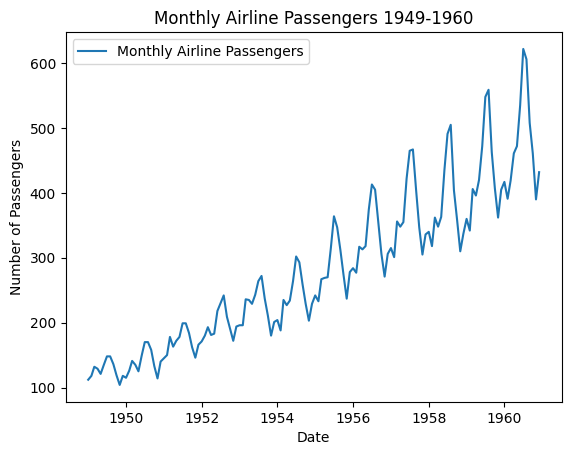

In [22]:
# visualize the data
plt.Figure(figsize=(12,6))
plt.plot(df['passengers'], label='Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Monthly Airline Passengers 1949-1960')
plt.legend()
plt.show()

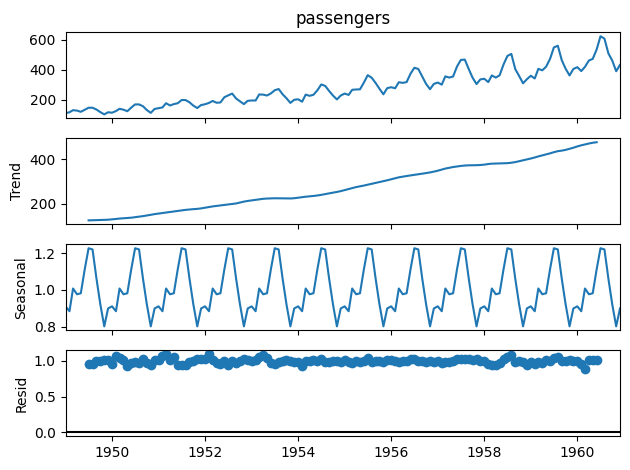

In [26]:
# Decomposition
decomposition = seasonal_decompose(df['passengers'], model='multiplicative')
fig = decomposition.plot()
plt.show()

In [28]:
# train-test split
train_data = df['passengers'][:'1959']
test_data = df['passengers']['1960':]

In [29]:
model_ARIMA = ARIMA(train_data, order=(1, 1, 1),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
results_ARIMA = model_ARIMA.fit()
print(results_ARIMA.summary())


                               SARIMAX Results                                
Dep. Variable:             passengers   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -617.005
Date:                Wed, 01 Oct 2025   AIC                           1240.010
Time:                        15:22:57   BIC                           1248.589
Sample:                    01-01-1949   HQIC                          1243.496
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5368      0.100     -5.344      0.000      -0.734      -0.340
ma.L1          0.9271      0.051     18.173      0.000       0.827       1.027
sigma2       826.9003     97.718      8.462      0.0

c:\Users\marks\Documents\GitHub\Learning-Journal\Scrapy\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\marks\Documents\GitHub\Learning-Journal\Scrapy\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\marks\Documents\GitHub\Learning-Journal\Scrapy\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


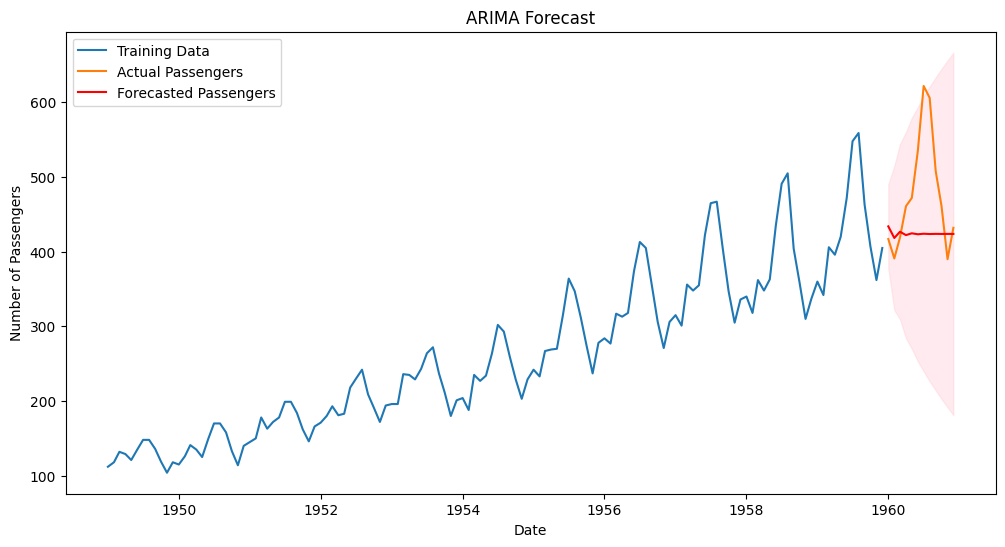

Mean Squared Error: 8281.608463842813


In [31]:
forecast_ARIMA = results_ARIMA.get_forecast(steps=12)
pred_conf_ARIMA = forecast_ARIMA.conf_int()
plt.figure(figsize=(12,6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Passengers')
plt.plot(forecast_ARIMA.predicted_mean, label='Forecasted Passengers', color='red')
plt.fill_between(pred_conf_ARIMA.index,
                 pred_conf_ARIMA.iloc[:, 0],
                 pred_conf_ARIMA.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()
forecasted = forecast_ARIMA.predicted_mean
mse = mean_squared_error(test_data, forecasted)
print(f'Mean Squared Error: {mse}')


In [33]:
# SARIMAX MODEL

model_SARIMAX = SARIMAX(train_data, 
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 12),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
results_SARIMAX = model_SARIMAX.fit()
print(results_SARIMAX.summary())

c:\Users\marks\Documents\GitHub\Learning-Journal\Scrapy\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\marks\Documents\GitHub\Learning-Journal\Scrapy\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         passengers   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -396.681
Date:                            Wed, 01 Oct 2025   AIC                            803.363
Time:                                    15:41:21   BIC                            816.633
Sample:                                01-01-1949   HQIC                           808.740
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5400      0.338     -1.596      0.110      -1.203       0.123
ma.L1          0.3075      0.368   

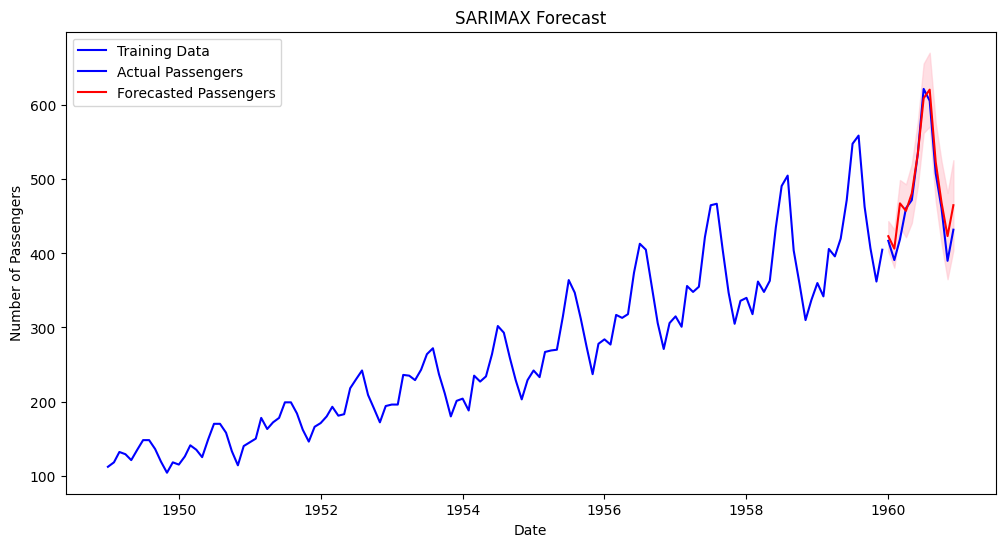

Mean Squared Error: 467.4755708445266


In [38]:
forecast_SARIMAX = results_SARIMAX.get_forecast(steps=12)
pred_conf_SARIMAX = forecast_SARIMAX.conf_int()
plt.figure(figsize=(12,6))
plt.plot(train_data, label='Training Data', color ='blue')
plt.plot(test_data, label='Actual Passengers', color='blue')
plt.plot(forecast_SARIMAX.predicted_mean, label='Forecasted Passengers', color='red')
plt.fill_between(pred_conf_SARIMAX.index,
                 pred_conf_SARIMAX.iloc[:, 0],
                 pred_conf_SARIMAX.iloc[:, 1], color='pink', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()
forecasted = forecast_SARIMAX.predicted_mean
mse = mean_squared_error(test_data, forecasted)
print(f'Mean Squared Error: {mse}')
